In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, 'Functions')
from plotting_functions import plot_avg_day_trade, plot_avg_day_trade_glued, plot_avg_day_trade_glued_counter
sys.path.insert(0, 'Forecasting')
from preprocess_data import initial_preprocessing

import os

In [28]:
df = pd.read_csv('Data/preprocessed_dataset.csv')
df["Datetime from"] = pd.to_datetime(df["Datetime from"])
df["Datetime offer time"] = pd.to_datetime(df["Datetime offer time"])

In [31]:
df[(df['Datetime offer time'].dt.hour < 16) & (df['Datetime offer time'].dt.day < df['Datetime from'].dt.day)]

,Unnamed: 0,Price (EUR),Volume (MW),Datetime from,Datetime offer time,Week day,Time to delivery
17260511,17260511,38.30,0.8,2020-01-02 04:45:00,2020-01-01 15:00:00,2,825.0
17260512,17260512,46.60,0.6,2020-01-02 05:45:00,2020-01-01 15:02:00,2,883.0
17260513,17260513,31.65,3.7,2020-01-02 04:45:00,2020-01-01 15:02:00,2,823.0
17260514,17260514,48.98,1.0,2020-01-02 13:00:00,2020-01-01 15:02:00,2,1318.0
17260515,17260515,46.86,1.0,2020-01-02 13:00:00,2020-01-01 15:03:00,2,1317.0
...,...,...,...,...,...,...,...
42308839,42308839,43.25,0.4,2020-12-31 09:15:00,2020-12-30 15:34:00,2,1061.0
42308840,42308840,40.94,0.5,2020-12-31 10:00:00,2020-12-30 15:47:00,2,1093.0
42308841,42308841,43.14,2.2,2020-12-31 10:00:00,2020-12-30 15:47:00,2,1093.0
42308842,42308842,35.26,0.3,2020-12-31 04:45:00,2020-12-30 15:51:00,2,774.0


In [29]:
df[(df['Datetime from'] >= datetime(day=1, month=1, year=2020, hour=0)) & (df['Datetime from'] - df['Datetime offer time'] < timedelta(hours=1))]

,Unnamed: 0,Price (EUR),Volume (MW),Datetime from,Datetime offer time,Week day,Time to delivery
17225063,17225063,49.42,0.1,2020-01-01 00:00:00,2019-12-31 23:01:00,1,59.0
17225065,17225065,50.91,0.9,2020-01-01 00:00:00,2019-12-31 23:01:00,1,59.0
17225067,17225067,50.91,1.0,2020-01-01 00:00:00,2019-12-31 23:01:00,1,59.0
17225113,17225113,50.91,0.4,2020-01-01 00:00:00,2019-12-31 23:04:00,1,56.0
17225114,17225114,50.91,0.1,2020-01-01 00:00:00,2019-12-31 23:04:00,1,56.0
...,...,...,...,...,...,...,...
42406527,42406527,60.70,12.6,2020-12-31 22:45:00,2020-12-31 22:39:00,3,6.0
42406528,42406528,83.20,0.1,2020-12-31 22:45:00,2020-12-31 22:39:00,3,6.0
42406529,42406529,87.00,0.1,2020-12-31 22:45:00,2020-12-31 22:39:00,3,6.0
42406530,42406530,183.25,0.3,2020-12-31 22:45:00,2020-12-31 22:39:00,3,6.0


In [2]:
Slide_show_width = 4.71512
Paper_width = 6.30045
Format = 0
if Format == 0:
    Image_width = Slide_show_width
if Format == 1:
    Image_width = Paper_width
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica",
# })

if Format:
    EXTRA_SMALL = 6
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 11
else:
    EXTRA_SMALL = 6
    SMALL_SIZE = 8
    MEDIUM_SIZE = 9
    BIGGER_SIZE = 10

plt.rc('font', size=EXTRA_SMALL)         # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=EXTRA_SMALL)    # fontsize of the tick labels
plt.rc('ytick', labelsize=EXTRA_SMALL)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def plot_yearly(variable_1, variable_2, counter, dates, date_1, date_2, df_copy, weekdays, stat='mean'):
    fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(Image_width, 0.5*Image_width), sharex=True)

    # find min max of averaged prices
    max_values = []
    min_values = []
    for d in range(7):
        max_min = plot_avg_day_trade(
            df_copy, 
            variable_1[
                :, (dates > date_1) * (dates < date_2)
            ], counter[
                :, (dates > date_1) * (dates < date_2)
            ], 
            weekdays[(dates > date_1) * (dates < date_2)
            ], 
            dates[(dates > date_1) * (dates < date_2)
            ], return_min_max=True)
        min_values.append(max_min[0])
        max_values.append(max_min[1])
    for d in range(7):
        ax = axs[d, 0]
        plot_avg_day_trade(
        df_copy, 
        variable_1[
            :, (dates > date_1) * (dates < date_2)
        ], counter[
            :, (dates > date_1) * (dates < date_2)
        ], 
        weekdays[(dates > date_1) * (dates < date_2)
        ], 
        dates[(dates > date_1) * (dates < date_2)
        ], 
        f'price {stat}, ',
        week_days_chosen=[d],
        ax=ax, 
        xlabel=True,
        cbar_limits=[np.min(min_values), np.max(max_values)])

    # find min max of averaged volumes
    max_values = []
    min_values = []
    for d in range(7):
        max_min = plot_avg_day_trade(
            df_copy, variable_2[
                :, (dates > date_1) * (dates < date_2)
            ], counter[
                :, (dates > date_1) * (dates < date_2)
            ], 
            weekdays[(dates > date_1) * (dates < date_2)
            ], 
            dates[(dates > date_1) * (dates < date_2)
            ], return_min_max=True)
        min_values.append(max_min[0])
        max_values.append(max_min[1])
    # plot mean of volume
    for d in range(7):
        ax = axs[d, 1]
        plot_avg_day_trade(
        df_copy,
        variable_2[
            :, (dates > date_1) * (dates < date_2)
        ],
        counter[
            :, (dates > date_1) * (dates < date_2)
        ],
        weekdays[(dates > date_1) * (dates < date_2)
        ],
        dates[(dates > date_1) * (dates < date_2)
        ],
        f'volume {stat}, ',
        week_days_chosen=[d],
        ax=ax,
        xlabel=True,
        cbar_limits=[np.min(min_values), np.max(max_values)])

In [4]:
def plot_yearly_glued(variable_11, variable_12, variable_21, variable_22, counter_1, counter_2, dates, date_1, date_2, df_copy, weekdays, stat='mean', wdays_plot=range(7)):
    fig, axs = plt.subplots(ncols=3, nrows=len(wdays_plot), figsize=(Image_width, 0.7*Image_width), sharex=True, sharey=True)

    # find min max of averaged prices
    max_values = []
    min_values = []
    for d in wdays_plot:
        max_min = plot_avg_day_trade_glued(
            df_copy, 
            variable_11[
                :, (dates > date_1) * (dates < date_2)
            ], 
            counter_1[
                :, (dates > date_1) * (dates < date_2)
            ], 
            variable_12[
                :, (dates > date_1) * (dates < date_2 - timedelta(1))
            ], 
            counter_2[
                :, (dates > date_1) * (dates < date_2 - timedelta(1))
            ], 
            weekdays[(dates > date_1) * (dates < date_2)
            ], 
            dates[(dates > date_1) * (dates < date_2)
            ], return_min_max=True)
        min_values.append(max_min[0])
        max_values.append(max_min[1])
    for d in wdays_plot:
        try:
            ax = axs[d, 0]
        except:
            ax = axs[0]
        plot_avg_day_trade_glued(
        df_copy, 
        variable_11[
            :, (dates > date_1) * (dates < date_2)
        ], 
        counter_1[
            :, (dates > date_1) * (dates < date_2)
        ], 
        variable_12[
            :, (dates > date_1) * (dates < date_2 - timedelta(1))
        ], 
        counter_2[
            :, (dates > date_1) * (dates < date_2 - timedelta(1))
        ], 
        weekdays[(dates > date_1) * (dates < date_2)
        ], 
        dates[(dates > date_1) * (dates < date_2)
        ], 
        f'price {stat}, ',
        week_days_chosen=[d],
        ax=ax, 
        xlabel=True, ylabel=True,
        cbar_limits=[np.min(min_values), np.max(max_values)])

    # find min max of averaged volumes
    max_values = []
    min_values = []
    for d in wdays_plot:
        max_min = plot_avg_day_trade_glued(
            df_copy, 
            variable_21[
                :, (dates > date_1) * (dates < date_2)
            ], 
            counter_1[
                :, (dates > date_1) * (dates < date_2)
            ], 
            variable_22[
                :, (dates > date_1) * (dates < date_2 - timedelta(1))
            ], 
            counter_2[
                :, (dates > date_1) * (dates < date_2 - timedelta(1))
            ], 
            weekdays[(dates > date_1) * (dates < date_2)
            ], 
            dates[(dates > date_1) * (dates < date_2)
            ], return_min_max=True)
        min_values.append(max_min[0])
        max_values.append(max_min[1])
    # plot mean of volume
    for d in wdays_plot:
        try:
            ax = axs[d, 1]
        except:
            ax = axs[1]
        plot_avg_day_trade_glued(
        df_copy, 
        variable_21[
            :, (dates > date_1) * (dates < date_2)
        ], 
        counter_1[
            :, (dates > date_1) * (dates < date_2)
        ], 
        variable_22[
            :, (dates > date_1) * (dates < date_2 - timedelta(1))
        ], 
        counter_2[
            :, (dates > date_1) * (dates < date_2 - timedelta(1))
        ], 
        weekdays[(dates > date_1) * (dates < date_2)
        ],
        dates[(dates > date_1) * (dates < date_2)
        ],
        f'price std, ',
        week_days_chosen=[d],
        ax=ax,
        xlabel=True,
        cbar_limits=[np.min(min_values), np.max(max_values)])

    # find min max of averaged counter
    max_values = []
    min_values = []
    for d in wdays_plot:
        max_min = plot_avg_day_trade_glued_counter(
            df_copy, 
            variable_11[
                :, (dates > date_1) * (dates < date_2)
            ], 
            counter_1[
                :, (dates > date_1) * (dates < date_2)
            ], 
            variable_12[
                :, (dates > date_1) * (dates < date_2 - timedelta(1))
            ], 
            counter_2[
                :, (dates > date_1) * (dates < date_2 - timedelta(1))
            ], 
            weekdays[(dates > date_1) * (dates < date_2)
            ], 
            dates[(dates > date_1) * (dates < date_2)
            ], return_min_max=True)
        min_values.append(max_min[0])
        max_values.append(max_min[1])
    for d in wdays_plot:
        try:
            ax = axs[d, 2]
        except:
            ax = axs[2]
        plot_avg_day_trade_glued_counter(
        df_copy, 
        variable_11[
            :, (dates > date_1) * (dates < date_2)
        ], 
        counter_1[
            :, (dates > date_1) * (dates < date_2)
        ], 
        variable_12[
            :, (dates > date_1) * (dates < date_2 - timedelta(1))
        ], 
        counter_2[
            :, (dates > date_1) * (dates < date_2 - timedelta(1))
        ], 
        weekdays[(dates > date_1) * (dates < date_2)
        ], 
        dates[(dates > date_1) * (dates < date_2)
        ], 
        f'counter, ',
        week_days_chosen=[d],
        ax=ax, 
        xlabel=True,
        cbar_limits=[np.min(min_values), np.max(max_values)])
    plt.tight_layout()
    plt.savefig(f'SLIDE_SHOW_IMAGES/Trades_3D_illustration_2020_{wdays_plot}.pdf', bbox_inches = 'tight') 

In [6]:
df_copy = pd.read_csv('Data/Transactions/price_analysis_table.csv')
df_copy["Datetime from"] = pd.to_datetime(df_copy["Datetime from"])
df_copy["Datetime offer time"] = pd.to_datetime(df_copy["Datetime offer time"])

# correct 2020
df_copy.loc[df_copy['Datetime from'] >= datetime(day=1, month=1, year=2020, hour=0), 'Datetime offer time'] = df_copy.loc[df_copy['Datetime from'] >= datetime(day=1, month=1, year=2020, hour=0), 'Datetime offer time'] + timedelta(hours=1)

df_copy.loc[(df_copy['Datetime from'] > datetime(day=29, month=3, year=2020, hour=3)) & (df_copy['Datetime from'] < datetime(day=25, month=10, year=2020, hour=2)), 'Datetime offer time'] = df_copy.loc[(df_copy['Datetime from'] > datetime(day=29, month=3, year=2020, hour=3)) & (df_copy['Datetime from'] < datetime(day=25, month=10, year=2020, hour=2)), 'Datetime offer time'] + timedelta(hours=1)

df_copy = df_copy[(pd.to_datetime(df_copy['Datetime from']).dt.date != datetime(2020, 10, 25).date()) & (pd.to_datetime(df_copy['Datetime from']).dt.date != datetime(2020, 3, 29).date())]

dates = pd.date_range(start=np.min(pd.to_datetime(df_copy["Datetime offer time"])) - timedelta(hours=1), end=np.max(
    df_copy["Datetime offer time"]), freq='H')
weekdays = []
for d in dates:
    weekdays.append(d.weekday())
weekdays = np.array(weekdays)

hourly_weekdays = []
for d in df_copy['Datetime offer time']:
    hourly_weekdays.append(d.weekday())
hourly_weekdays = np.array(hourly_weekdays)

In [7]:
counter_1 = np.load('Data/Transactions/counter_1.npy')
counter_2 = np.load('Data/Transactions/counter_2.npy')

prices_mean_1 = np.load('Data/Transactions/prices_mean_1.npy')
prices_mean_2 = np.load('Data/Transactions/prices_mean_2.npy')

prices_std_1 = np.load('Data/Transactions/prices_std_1.npy')
prices_std_2 = np.load('Data/Transactions/prices_std_2.npy')

# volumes_mean_1 = np.load('Data/Transactions/volumes_mean_1.npy')
# volumes_mean_2 = np.load('Data/Transactions/volumes_mean_2.npy')

# volumes_std_1 = np.load('Data/Transactions/volumes_std_1.npy')
# volumes_std_2 = np.load('Data/Transactions/volumes_std_2.npy')

## 29.09.2018 - 31.12.2018

In [8]:
date_1 = datetime(year=2020, month=1, day=1)
date_2 = datetime(year=2021, month=1, day=1)

(96, 8759) (8759,)
(96, 8759) (8759,)
(96, 8759) (8759,)
(96, 8759) (8759,)


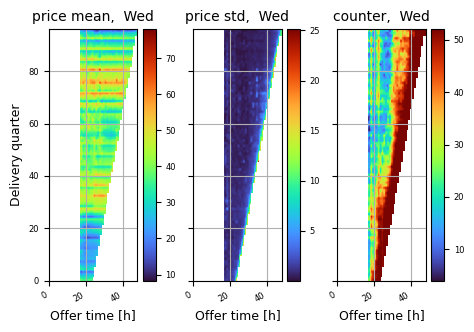

In [17]:
plot_yearly_glued(prices_mean_1, prices_mean_2, prices_std_1, prices_std_2, counter_1, counter_2, dates, date_1, date_2, df_copy, weekdays, wdays_plot=[2])

(96, 8759) (8759,)
(96, 8759) (8759,)
(96, 8759) (8759,)
(96, 8759) (8759,)


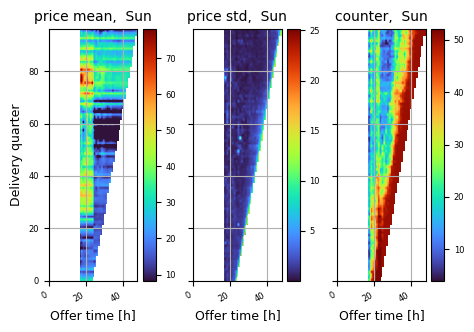

In [18]:
plot_yearly_glued(prices_mean_1, prices_mean_2, prices_std_1, prices_std_2, counter_1, counter_2, dates, date_1, date_2, df_copy, weekdays, wdays_plot=[6])

In [3]:
daily_data = np.load(f'Data/dense_nn_2020-01-01_volume_param_dummies.npy')

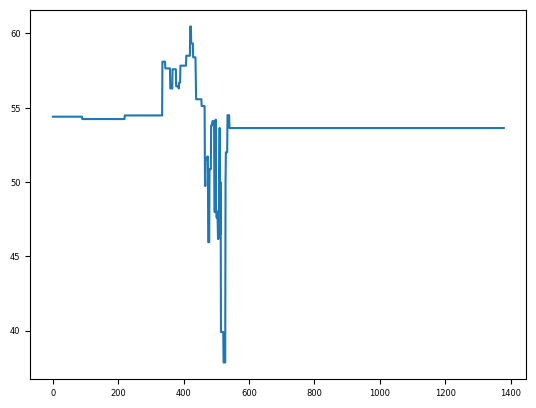

In [112]:
plt.plot(daily_data[0,0,:])

In [74]:
np.sort(np.unique(pd.to_datetime(df['Datetime from'])))[(365 + 93)*96]

numpy.datetime64('2020-01-01T03:00:00.000000000')

In [69]:
(365 + 60)*96

40800

In [4]:
df = pd.read_csv('Data/preprocessed_dataset.csv')

In [24]:
np.sort(np.unique(pd.to_datetime(df['Datetime from'])))[0]

numpy.datetime64('2018-09-30T00:00:00.000000000')

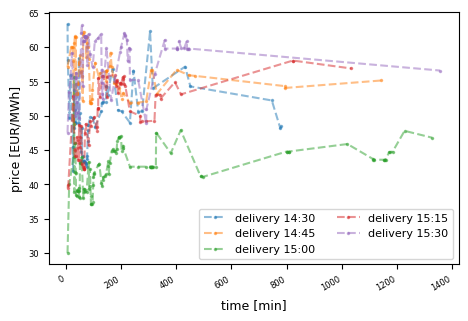

In [29]:
fig, ax = plt.subplots(figsize=(Image_width, 0.7*Image_width))
for dat in ['2018-11-03 14:30:00','2018-11-03 14:45:00','2018-11-03 15:00:00','2018-11-03 15:15:00','2018-11-03 15:30:00']:
    current_data_avg = df[df['Datetime from'] == dat].groupby('Time to delivery', as_index=False)
    price = []
    ttd = []
    for group in current_data_avg:
        price.append(np.sum(group[1]['Price (EUR)'].to_numpy()*group[1]['Volume (MW)'].to_numpy())/np.sum(group[1]['Volume (MW)']))
        ttd.append(group[1]['Time to delivery'].to_numpy()[0])
    ax.plot(ttd, price,marker='.',ls='--', markersize=3,alpha=0.5)
ax.set_xlabel('time [min]')
ax.set_ylabel('price [EUR/MWh]')
plt.legend(['delivery 14:30','delivery 14:45','delivery 15:00','delivery 15:15','delivery 15:30'], ncols=2)
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.savefig(f'SLIDE_SHOW_IMAGES/example_of_prices_01_01_2020.pdf', bbox_inches = 'tight')

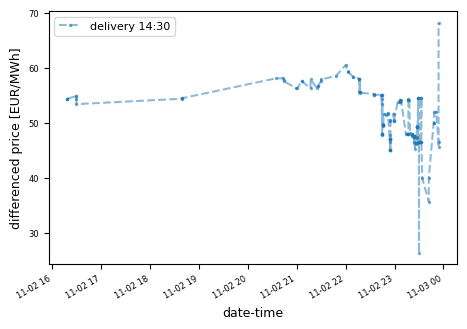

In [16]:
fig, ax = plt.subplots(figsize=(Image_width, 0.7*Image_width))
for dat in ['2018-11-03 14:30:00','2018-11-03 14:45:00','2018-11-03 15:00:00','2018-11-03 15:15:00','2018-11-03 15:30:00']:
    ax.plot(pd.to_datetime(df[df['Datetime from'] == dat].sort_values(by='Datetime offer time')['Datetime offer time']), df[df['Datetime from'] == dat].sort_values(by='Datetime offer time')['Price (EUR)'],marker='.',ls='--', markersize=3,alpha=0.5)
ax.set_xlabel('date-time')
ax.set_ylabel('differenced price [EUR/MWh]')
plt.legend(['delivery 14:30','delivery 14:45','delivery 15:00','delivery 15:15','delivery 15:30'], ncols=2)
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.savefig(f'SLIDE_SHOW_IMAGES/example_of_prices_03_111_2018.pdf', bbox_inches = 'tight')

In [28]:
9*60 + 14*60

1380

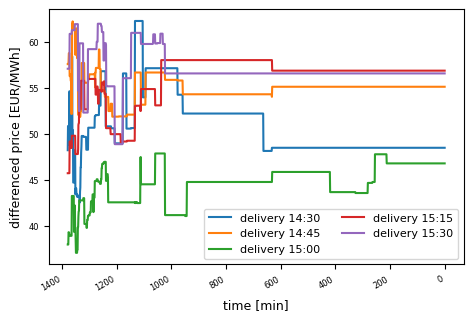

In [30]:
fig, ax = plt.subplots(figsize=(Image_width, 0.7*Image_width))
ax.plot(daily_data[1,58:63].T)
ax.set_xlabel('time [min]')
ax.set_ylabel('differenced price [EUR/MWh]')
plt.legend(['delivery 14:30','delivery 14:45','delivery 15:00','delivery 15:15','delivery 15:30'], ncols=2)
plt.tight_layout()
plt.gcf().autofmt_xdate()
ax.invert_xaxis()
plt.savefig(f'SLIDE_SHOW_IMAGES/example_of_preprocessed_prices_03_11_2018.pdf', bbox_inches = 'tight')

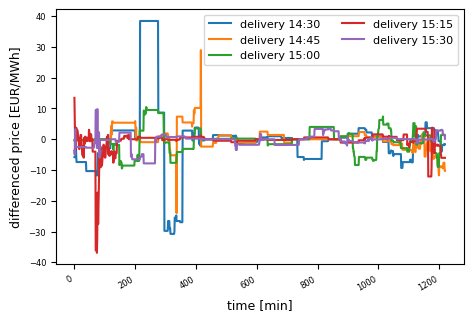

In [39]:
fig, ax = plt.subplots(figsize=(Image_width, 0.7*Image_width))
daily_data = np.load(f'test.npy')
ax.plot(daily_data)
ax.set_xlabel('time [min]')
ax.set_ylabel('differenced price [EUR/MWh]')
plt.legend(['delivery 14:30','delivery 14:45','delivery 15:00','delivery 15:15','delivery 15:30'], ncols=2)
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.savefig(f'SLIDE_SHOW_IMAGES/example_of_prices_01_01_2020.pdf', bbox_inches = 'tight')

## 01.01.2019 - 31.12.2019

In [18]:
date_1 = datetime(year=2019, month=1, day=1)
date_2 = datetime(year=2020, month=1, day=1)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 19785 but corresponding boolean dimension is 19784

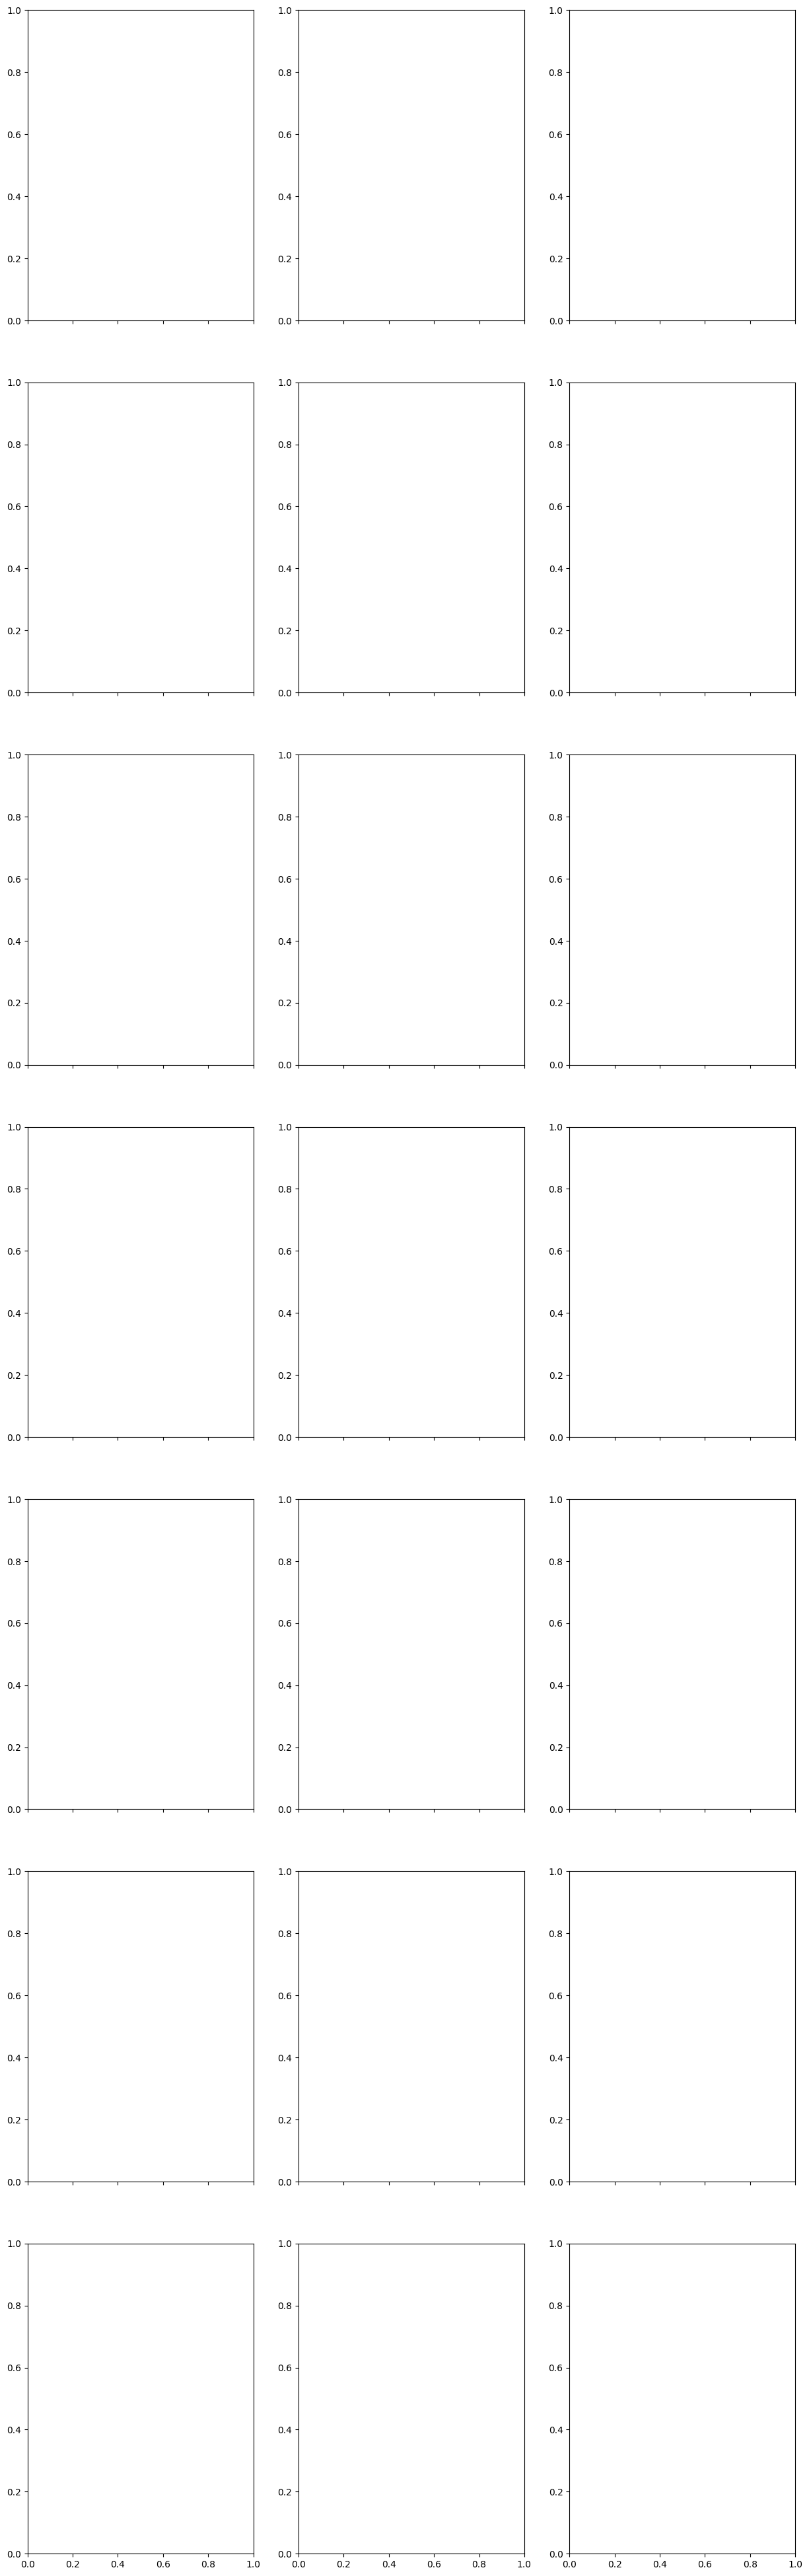

In [19]:
plot_yearly_glued(prices_mean_1, prices_mean_2, prices_mean_1, prices_mean_2, counter_1, counter_2, dates, date_1, date_2, df_copy, weekdays)

## 01.01.2020 - 31.12.2020

In [27]:
date_1 = datetime(year=2020, month=1, day=1)
date_2 = datetime(year=2021, month=1, day=1)

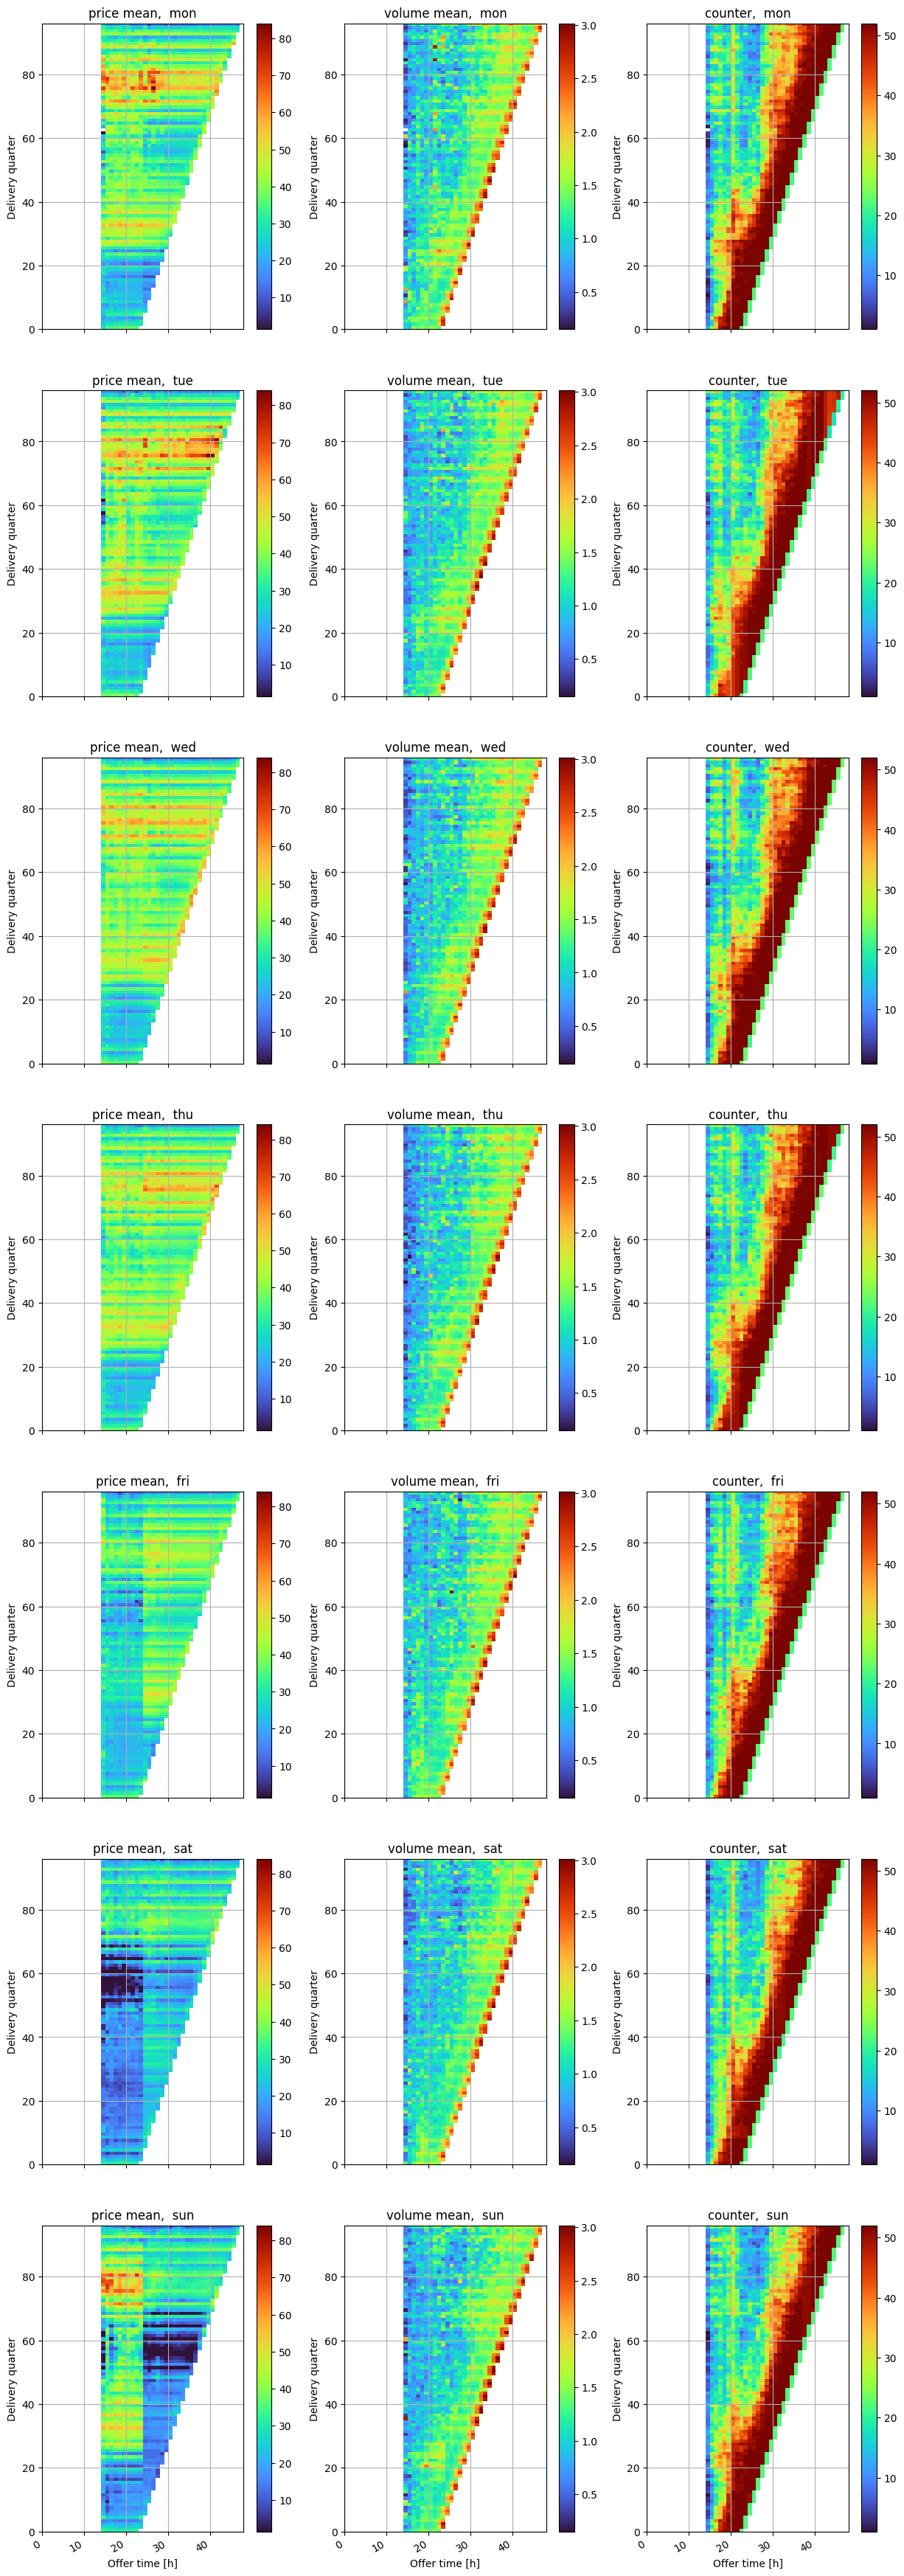

In [28]:
plot_yearly_glued(prices_mean_1, prices_mean_2, volumes_mean_1, volumes_mean_2, counter_1, counter_2, dates, date_1, date_2, df_copy, weekdays)

# VARIABILITY ANALYSIS

## 29.09.2018 - 31.12.2018

In [29]:
date_1 = datetime(year=2018, month=10, day=20)
date_2 = datetime(year=2019, month=1, day=1)

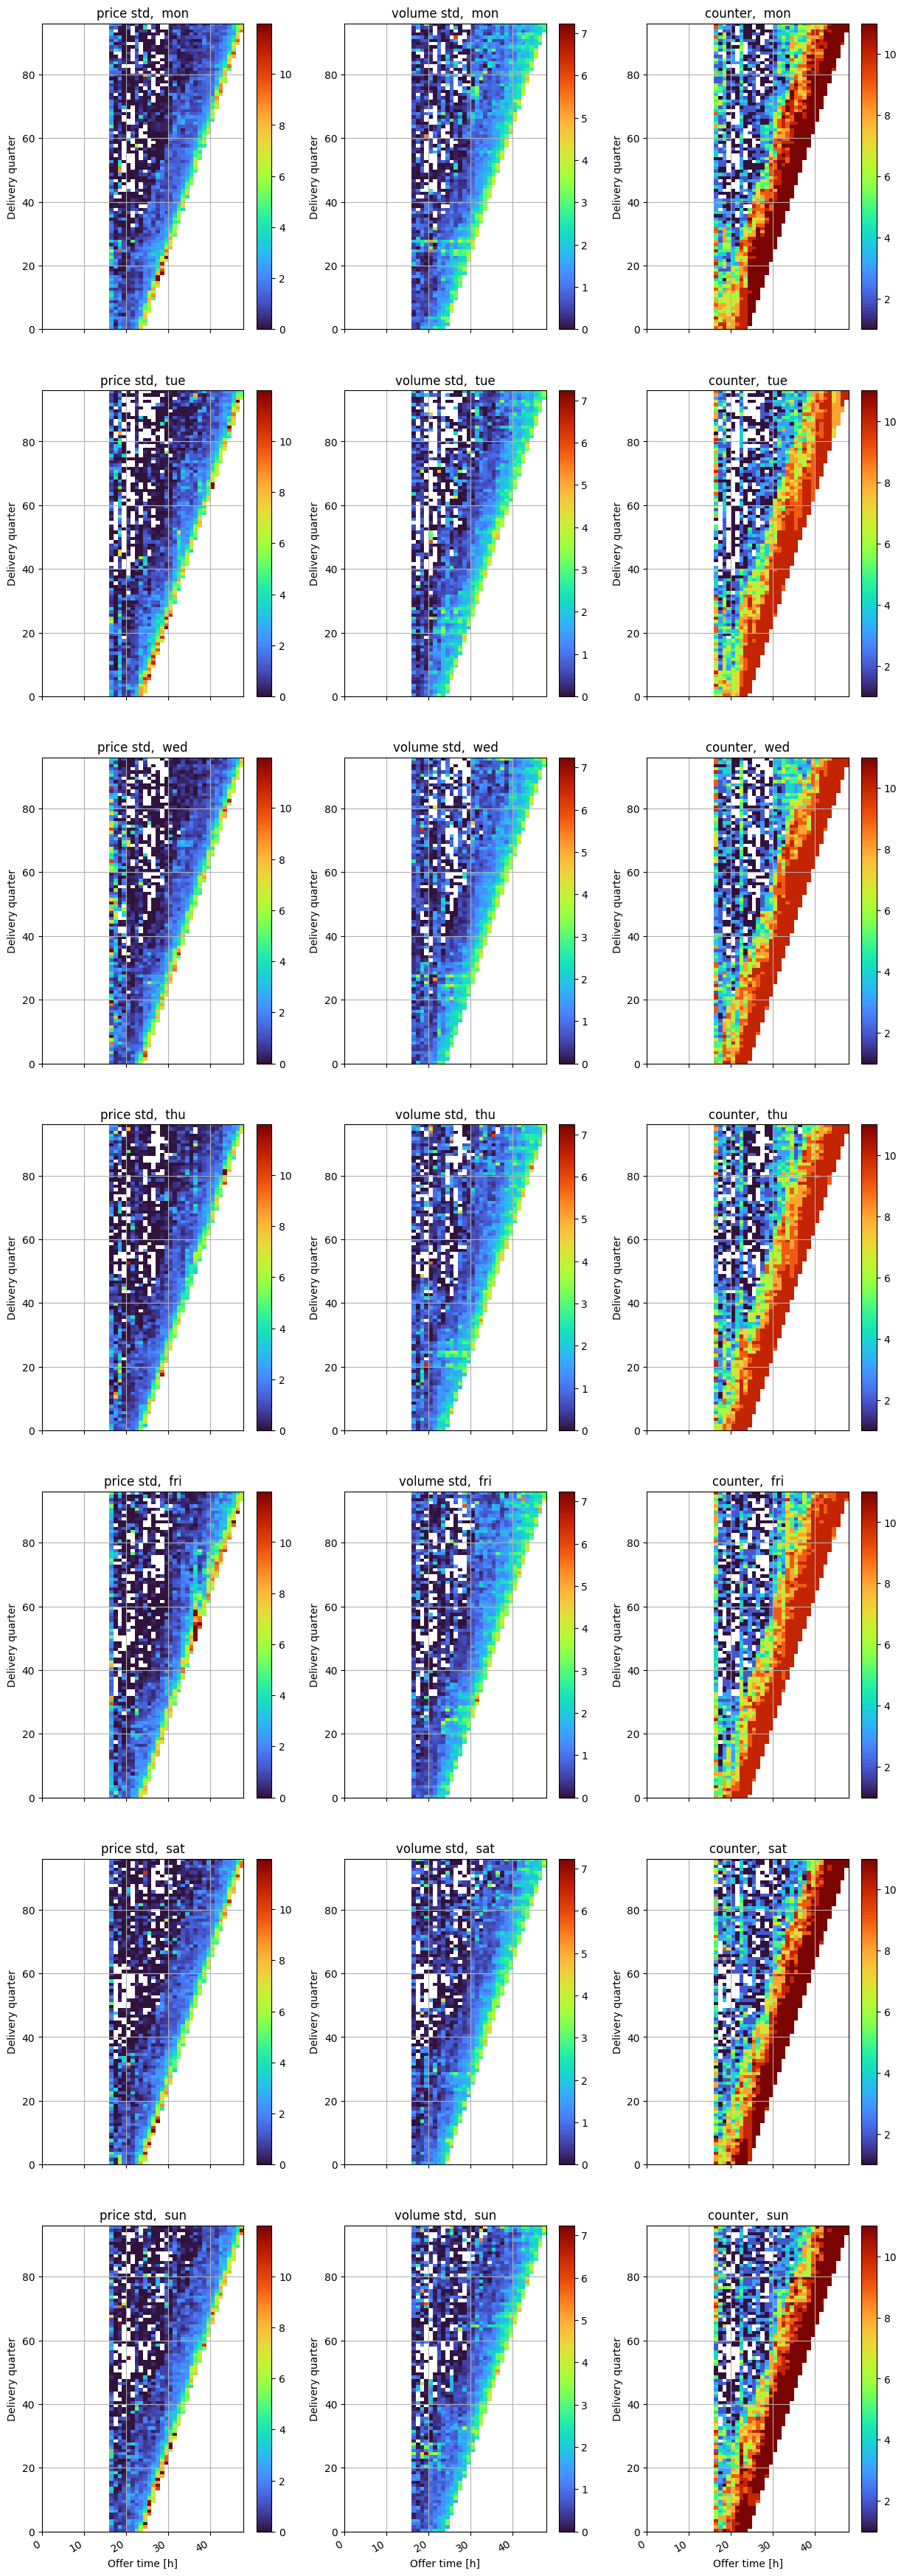

In [30]:
plot_yearly_glued(prices_std_1, prices_std_2, volumes_std_1, volumes_std_2, counter_1, counter_2, dates, date_1, date_2, df_copy, weekdays, stat='std')

## 01.01.2019 - 31.12.2019

In [31]:
date_1 = datetime(year=2019, month=1, day=1)
date_2 = datetime(year=2020, month=1, day=1)

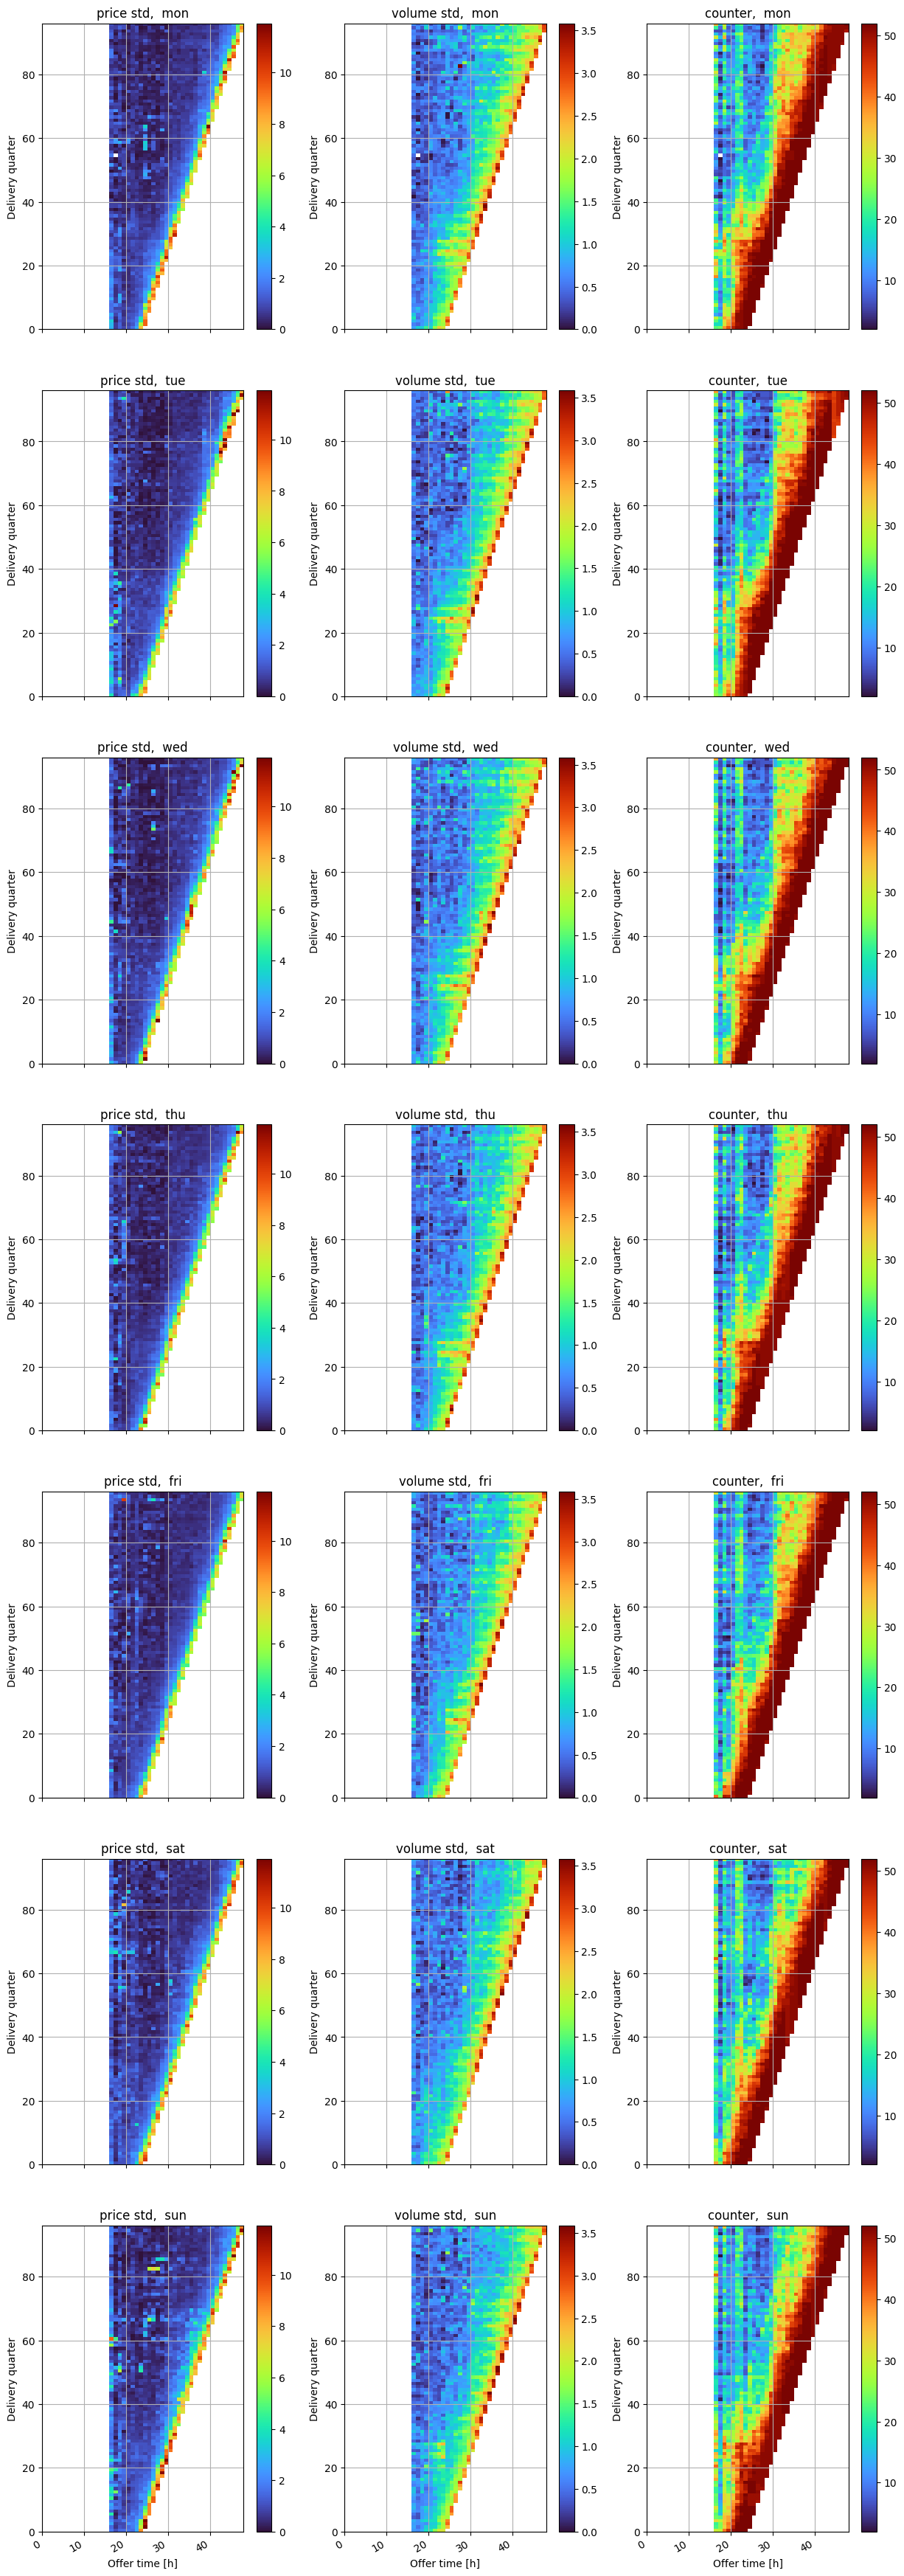

In [32]:
plot_yearly_glued(prices_std_1, prices_std_2, volumes_std_1, volumes_std_2, counter_1, counter_2, dates, date_1, date_2, df_copy, weekdays, stat='std')

## 01.01.2020 - 31.12.2020

In [33]:
date_1 = datetime(year=2020, month=1, day=1)
date_2 = datetime(year=2021, month=1, day=1)

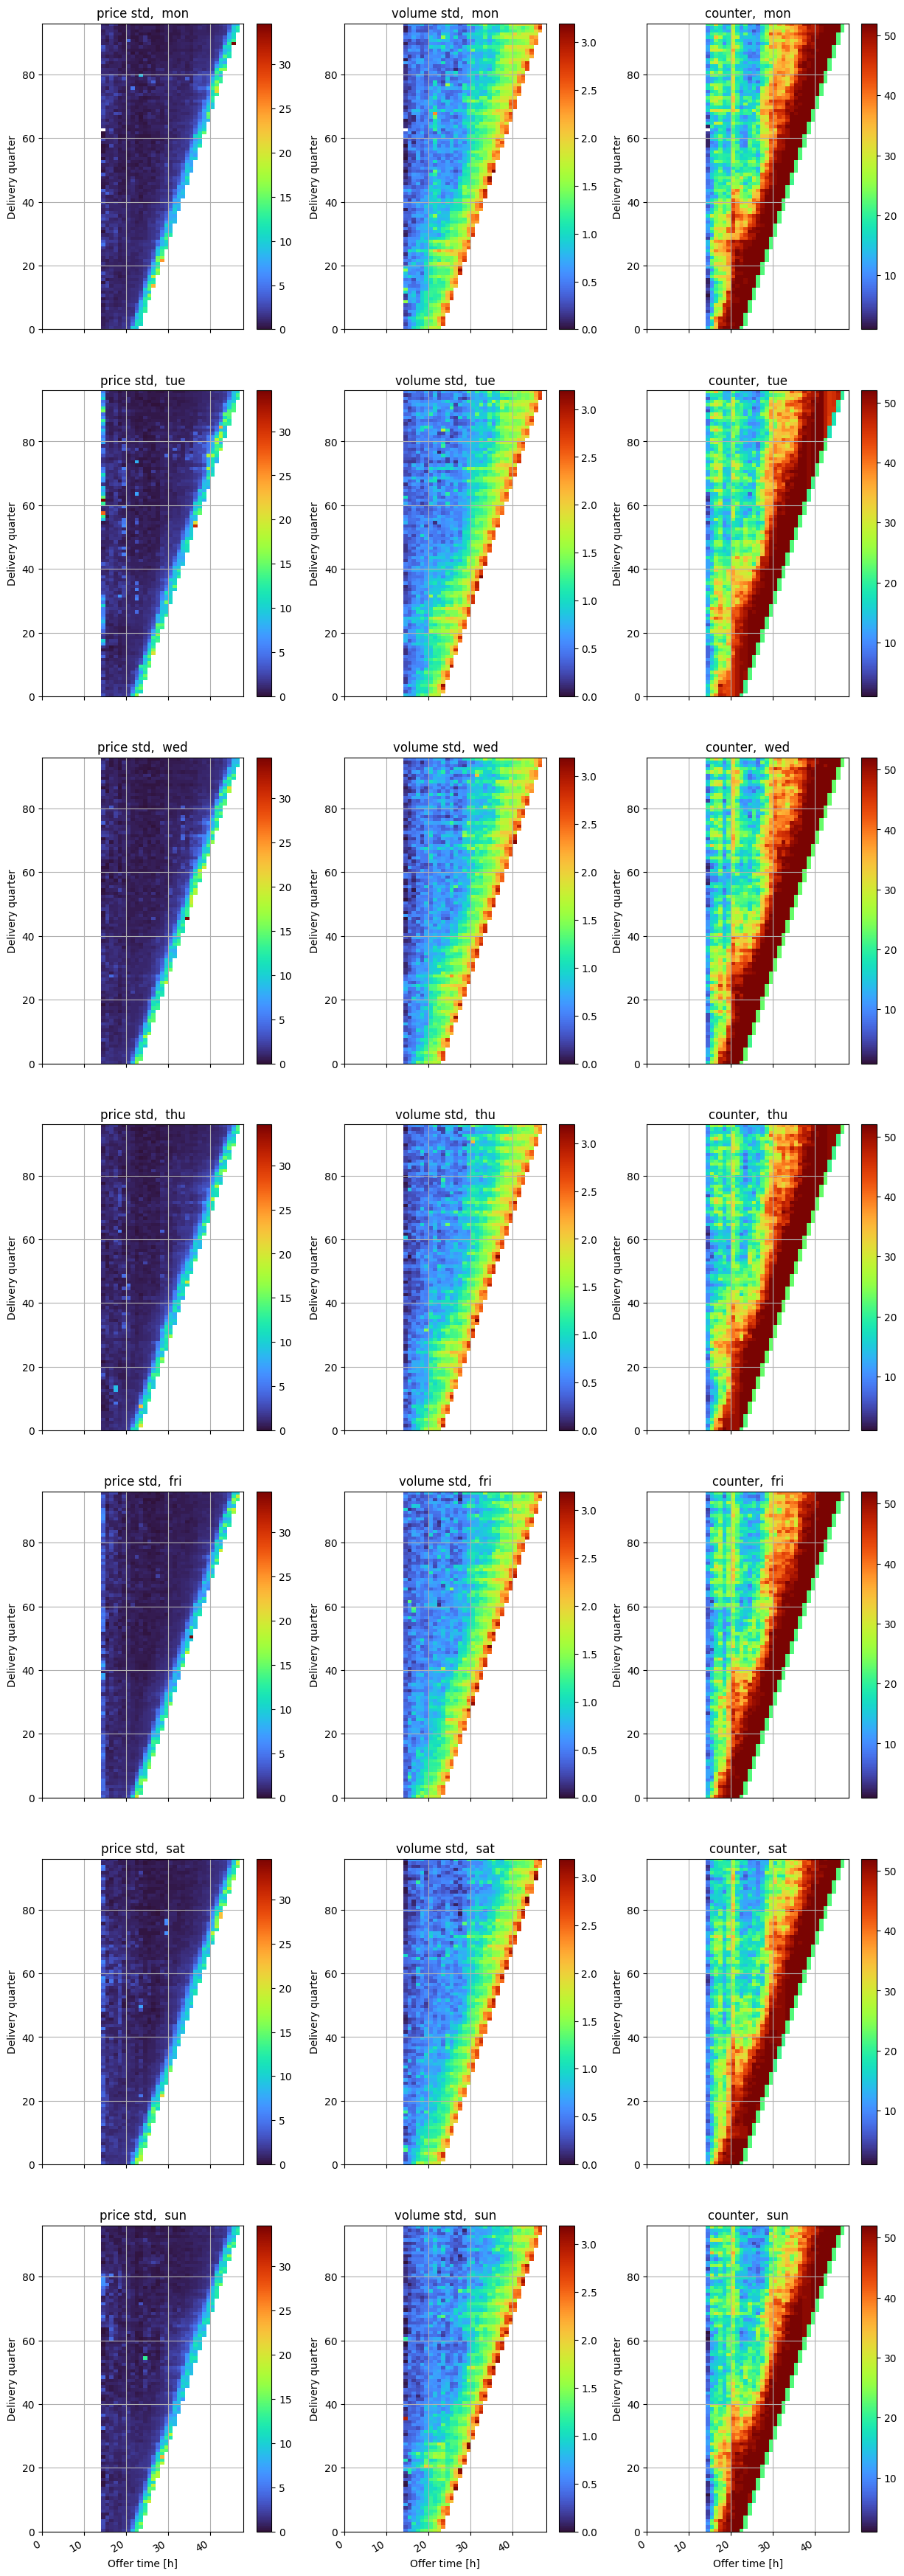

In [34]:
plot_yearly_glued(prices_std_1, prices_std_2, volumes_std_1, volumes_std_2, counter_1, counter_2, dates, date_1, date_2, df_copy, weekdays, stat='std')